In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import scipy.stats as stats


import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of HAT-P-26b
# https://exoplanetarchive.ipac.caltech.edu/overview/HAT-P-26b

In [3]:
df = pd.read_csv("HAT_P_26b_literature.csv")#, header=None)
df = df.set_index('Parameter')


In [4]:
df

,Stassun et al. 2017,Ivshina & Winn 2022,Kokori et al. 2022,Stevenson et al. 2016,Knutson et al. 2014,Hartman et al. 2010,ExoFOP-TESS TOI,This work
Parameter,,,,,,,,
b,---,---,---,---,---,0.303+0.112-0.122,---,---
w,---,---,---,---,46.0+33.0-71.0,54+/-165,---,---
e,0.12+/-0.06,---,---,---,0.14+0.12-0.08,0.124+/-0.060,---,---
i,88.60+/-0.70,---,---,---,---,88.6+0.5-0.9,---,87.4434626493859+1.7370095207262466-1.71335363...
P,4.234520+/-0.000015,4.2345026+/-0.0000012,4.2345002+/-0.0000007,4.2345023+/-0.0000007,---,4.234516+/-0.000015,4.23421531199059+/-0.00038078934000,4.234405012144481+0.00035890063727084254-0.000...
R,0.63+/-0.04,---,---,---,---,0.565+0.072-0.032,0.633090516520065+/-0.044352584173867,---
RpRs,---,---,---,---,---,0.0737+/-0.0012,---,0.07243734608280364+0.0018950883660648482-0.00...
a,---,---,---,---,---,0.0479+/-0.0006,---,---
delta,0.5400+/-0.0013,---,---,---,---,0.543+/-0.018,0.613740698692874+/-0.019988913000000,---


In [5]:
df_ref_list = df.columns

df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
df_R_list = df.loc['R'] #Planetary radius row
df_a_list = df.loc['a'] #Semi-major axis row
df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
df_w_list = df.loc['w']
df_color = df.loc['colour'] #Colours
df_a_Rs_list = df.loc['a/R*']


e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)


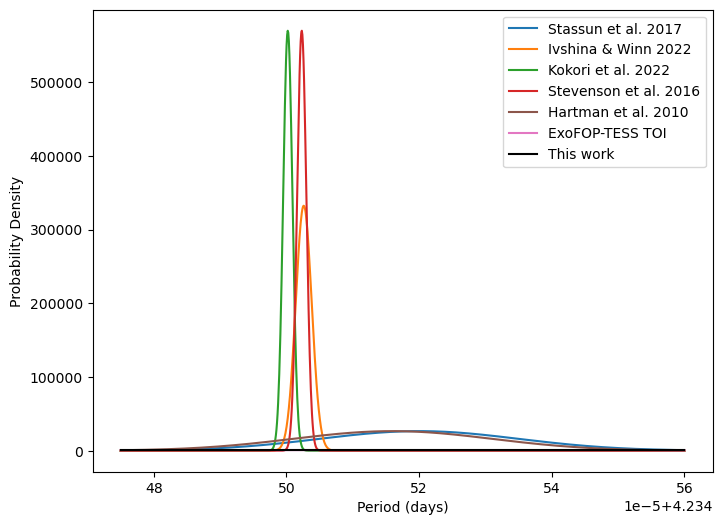

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(4.234475, 4.23456, 1000)
for P_obj, author in zip(P_list, P_ref_list):
    mu, upper, lower = P_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel("Period (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

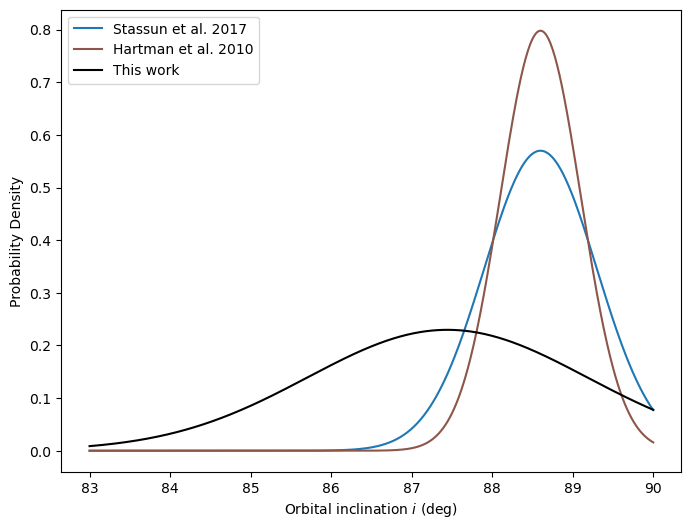

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(83, 90, 500)
for i_obj, author in zip(i_list, i_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Orbital inclination $i$ (deg)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

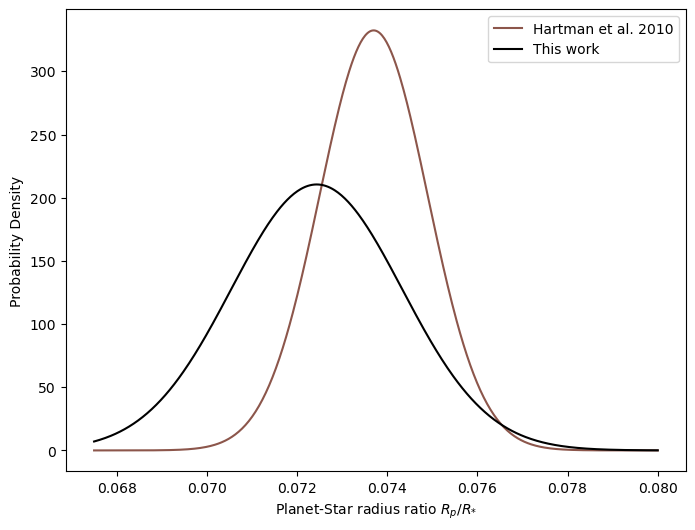

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.0675, 0.08, 500)
for RpRs_obj, author in zip(RpRs_list, RpRs_ref_list):
    mu, upper, lower = RpRs_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

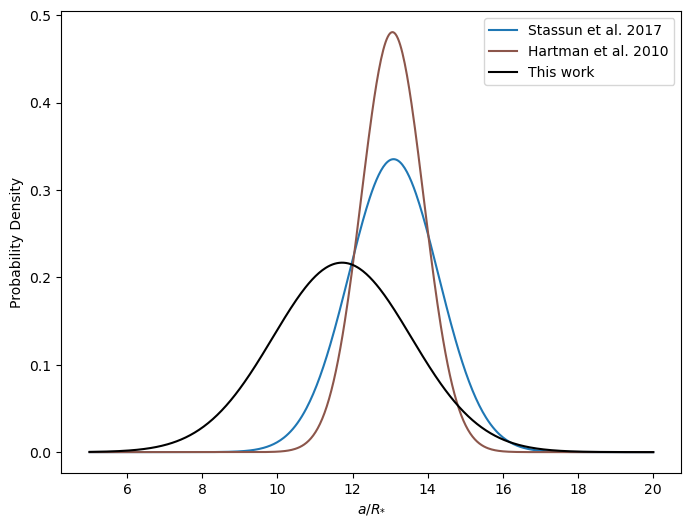

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(5, 20, 500)
for i_obj, author in zip(a_Rs_list, a_Rs_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"$a/R_{*}$")
plt.ylabel("Probability Density")
ax.legend()
plt.show()